In [42]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import sys
sys.path.append('/n/des/lee.5922/programs/cosmolike/MG_musigma/')
from noshellavg import *
from run_error_analysis import *
from plot_chain import plot_single, plot_triple, plot_distributions, plot_summary_bar
%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [43]:
pwd

u'/n/des/lee.5922/Dropbox/repositories/bandpower/SNR'

In [2]:
Ashley_mat = np.genfromtxt('Ashley_mat.dat')

In [3]:
#kk, kk_s = np.linspace(0.004, 2, 500, retstep=True)
kk, kk_s = np.linspace(0.0, 2, 501, retstep=True)
#kk, kk_s = np.linspace(0.02, 0.3, 71, retstep=True)
rr, rr_s = np.linspace(32, 200, 43, retstep=True)

print kk_s, rr_s
print kk[5], kk[75]

0.004 4.0
0.02 0.3


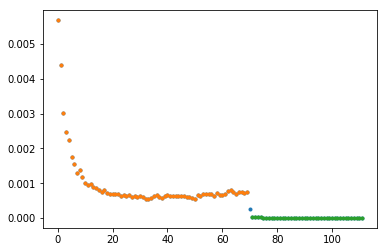

In [4]:
fig, ax = plt.subplots()
ax.plot(np.arange(Ashley_mat.diagonal().size ),Ashley_mat.diagonal(), '.' )
ax.plot(np.arange(0, 70),Ashley_mat.diagonal()[0:70], '.' )
ax.plot(np.arange(71, 112),Ashley_mat.diagonal()[71:], '.' )

In [45]:
kk_analytic = np.linspace(0.0001, 2, 501)[5:75]
Pdatav = np.genfromtxt('data_txt/datav/test_b_Ashley_p0_smallnn_multipole_p.datavector')[5:75]
Cpp_analytic = np.genfromtxt('data_txt/cov/test_b_Ashley_p0_smallnn_PP.cov')[5:75, 5:75]
Cxi_analytic = np.genfromtxt('data_txt/cov/test_b_Ashley_p0_smallnn_Xi.cov')[0:42,0:42]
Cpxi_analytic = np.flip(np.genfromtxt('data_txt/cov/test_b_Ashley_p0_smallnn_PXi.cov')[5:75,:42], 1)
Ctot_analytic = np.vstack(( np.hstack((Cpp_analytic, Cpxi_analytic)), np.hstack((Cpxi_analytic.T, Cxi_analytic)) ))

In [46]:
Cpp = np.genfromtxt('/n/des/lee.5922/programs/cosmolike/MG_musigma/datav/cosmolike_cosmosis/pkred10_p002_03.cov')
Cpxi = Ashley_mat[0:70, 70:]
Cxi = Ashley_mat[70:, 70:]
Ctot = np.vstack(( np.hstack((Cpp, Cpxi)), np.hstack((Cpxi.T, Cxi)) ))
#np.savetxt('data_txt/cov/Ashley_mat_p.cov', Cpp)
#np.savetxt('data_txt/cov/Ashley_mat_pxi.cov', Cpxi)
#np.savetxt('data_txt/cov/Ashley_mat_xi.cov', Cxi)
#np.savetxt('data_txt/cov/Ashley_mat_tot.cov', Ctot)


Fpp = np.linalg.inv(Cpp)
Fxi = np.linalg.inv(Cxi)
Ftot = np.linalg.inv(Ctot)
zeros = np.zeros((Cpxi.shape))
Fdiff = np.vstack(( np.hstack((Fpp, zeros)), np.hstack((zeros.T, Fxi)) ))

#np.savetxt('data_txt/cov/Ashley_mat_p.fisher', Fpp)
#np.savetxt('data_txt/cov/Ashley_mat_xi.fisher', Fxi)
#np.savetxt('data_txt/cov/Ashley_mat_tot.fisher', Ftot)
np.savetxt('data_txt/cov/Ashley_mat_diff.fisher', Fdiff)


/n/home00/lee.5922/.local/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in divide
  after removing the cwd from sys.path.


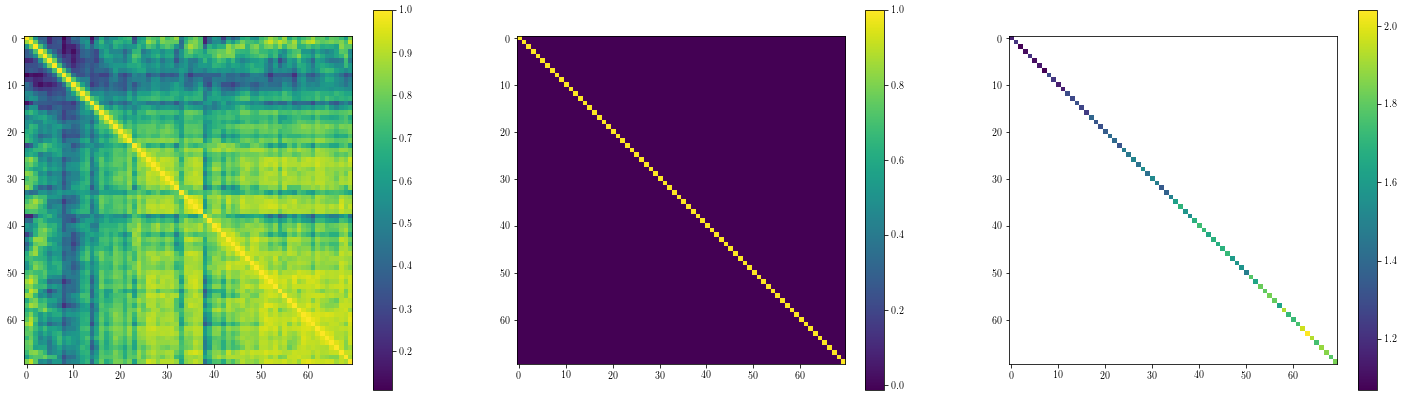

In [47]:
fig, (ax,ax2,ax3) = plt.subplots(1,3, figsize=(25,7))
im = ax.imshow(np.corrcoef(Cpp))
im2 = ax2.imshow(np.corrcoef(Cpp_analytic))
im3 = ax3.imshow(Cpp/Cpp_analytic )

fig.colorbar(im, ax=ax)
fig.colorbar(im2, ax=ax2)
fig.colorbar(im3, ax=ax3)


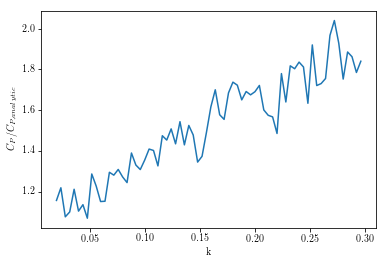

In [53]:
fig, ax = plt.subplots()
ax.plot(kk[5:75], Cpp.diagonal() /Cpp_analytic.diagonal())
#ax.plot(kk[:70], Cpp.diagonal() /Cpp_analytic.diagonal())
ax.set_xlabel('k')
ax.set_ylabel(r'$C_{P}$/$C_{P, analytic}$')

analytic err 4.07450883759e-06 0.000324058838569 3.69614873985e-06 4.02391470445e-06


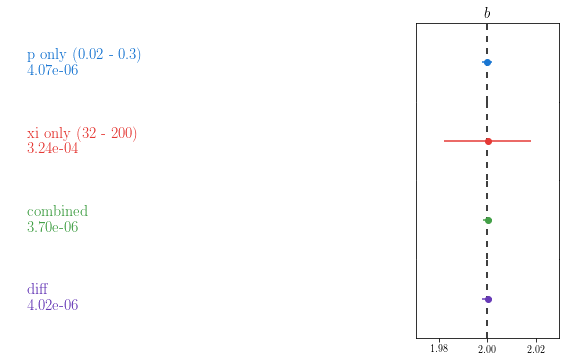

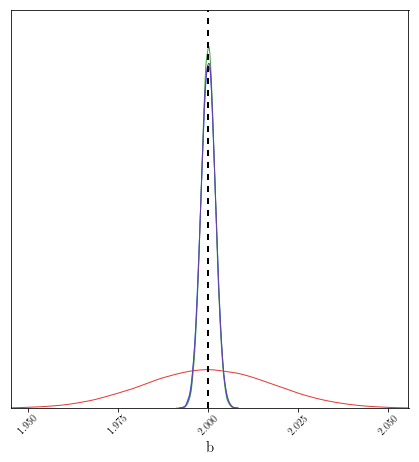

In [10]:
_, analytic_Fp, analytic_Fxi, analytic_Ftot = np.genfromtxt('data_txt/test_b_Ashley_p0_fisher_params.txt')
analytic_Fdiff = analytic_Fp + analytic_Fxi

print 'analytic err',1./analytic_Fp, 1./analytic_Fxi, 1./analytic_Ftot, 1./analytic_Fdiff
analytic_chain_p = np.random.multivariate_normal([2.0], [[1./analytic_Fp]], size=100000)
analytic_chain_xi = np.random.multivariate_normal([2.0], [[1./analytic_Fxi]], size=100000)
analytic_chain_tot = np.random.multivariate_normal([2.0], [[1./analytic_Ftot]], size=100000)
analytic_chain_diff = np.random.multivariate_normal([2.0], [[1./analytic_Fdiff]], size=100000)

params_name = ['b']
params_truth = [2.0]

chains = [analytic_chain_p, analytic_chain_xi, analytic_chain_tot,analytic_chain_diff]
chain_names = ['p only (0.02 - 0.3)\n{:0.2e}'.format(1./analytic_Fp),
               'xi only (32 - 200)\n{:0.2e}'.format(1./analytic_Fxi), 
               'combined\n{:0.2e}'.format(1./analytic_Ftot),
               'diff\n{:0.2e}'.format(1./analytic_Fdiff)]
plot_summary_bar(chains, params_name, params_truth=params_truth, chain_names=chain_names)
plot_distributions(chains, params_name, params_truth=params_truth, chain_names = chain_names)

analytic 0.91854549893


sample size (7320, 1) (19000, 1) (6948, 1)


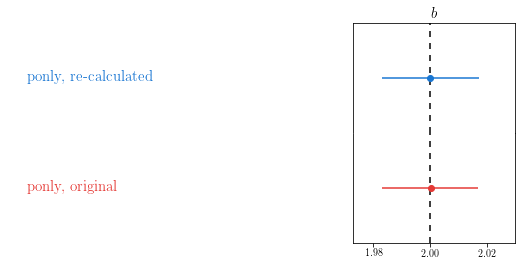

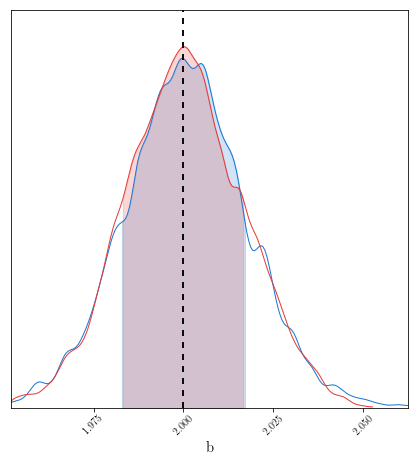

In [59]:
_, analytic_Fp, analytic_Fxi, analytic_Ftot = np.genfromtxt('data_txt/test_b_Ashley_p0_fisher_params.txt')
analytic_Fdiff = analytic_Fp + analytic_Fxi

analytic_chain_p = np.random.multivariate_normal([2.0], [[1./analytic_Fp]], size=100000)
analytic_chain_xi = np.random.multivariate_normal([2.0], [[1./analytic_Fxi]], size=100000)
analytic_chain_tot = np.random.multivariate_normal([2.0], [[1./analytic_Ftot]], size=100000)
analytic_chain_diff = np.random.multivariate_normal([2.0], [[1./analytic_Fdiff]], size=100000)

params_name = ['b']
params_truth = [2.0]
ponly_chains = np.genfromtxt('like/like_mcmc_re_Ashley_ponly_b_p0_sam24000')[3000:, :-1]
ponly_chains2 = np.genfromtxt('like/like_mcmc_Ashley_ponly_b_p0_sam24000')[5000:, :-1]
xionly_chains = np.genfromtxt('like/like_mcmc_Ashley_xionly_b_p0_sam24000')[5000:, :-1]
combined_chains = np.genfromtxt('like/like_mcmc_Ashley_combined_b_p0_sam24000')[5000:, :-1]
diff_chains = np.genfromtxt('like/like_mcmc_re_Ashley_diff_b_p0_sam24000')[3000:, :-1]

print 'sample size', ponly_chains.shape, xionly_chains.shape, diff_chains.shape

chains = [ponly_chains, ponly_chains2]
chain_names = ['ponly, re-calculated', 'ponly, original', 'xi only (32 - 200)', 'combined', 'diff']

#chains = [ponly_chains, ponly_chains2, combined_chains, diff_chains]
#chain_names = ['p only (0.02 - 0.3)', 'xi only (32 - 200)', 'combined', 'diff']

plot_summary_bar(chains, params_name, params_truth=params_truth, chain_names=chain_names)
plot_distributions(chains, params_name, params_truth=params_truth, chain_names = chain_names)

In [32]:
#Analytic matrix
print np.cov(combined_chains.ravel())
print np.cov(diff_chains.ravel())

print 'analytic, err_tot/err_diff' ,np.sqrt(1./analytic_Ftot /(1./analytic_Fdiff))
print 'mock, err_tot/err_diff    ', np.sqrt(np.cov(combined_chains.ravel())/ np.cov(diff_chains.ravel()))

5.83082050503e-05
0.0029342229866
analytic, err_tot/err_diff 0.95840779365
mock, err_tot/err_diff     0.140967266588
